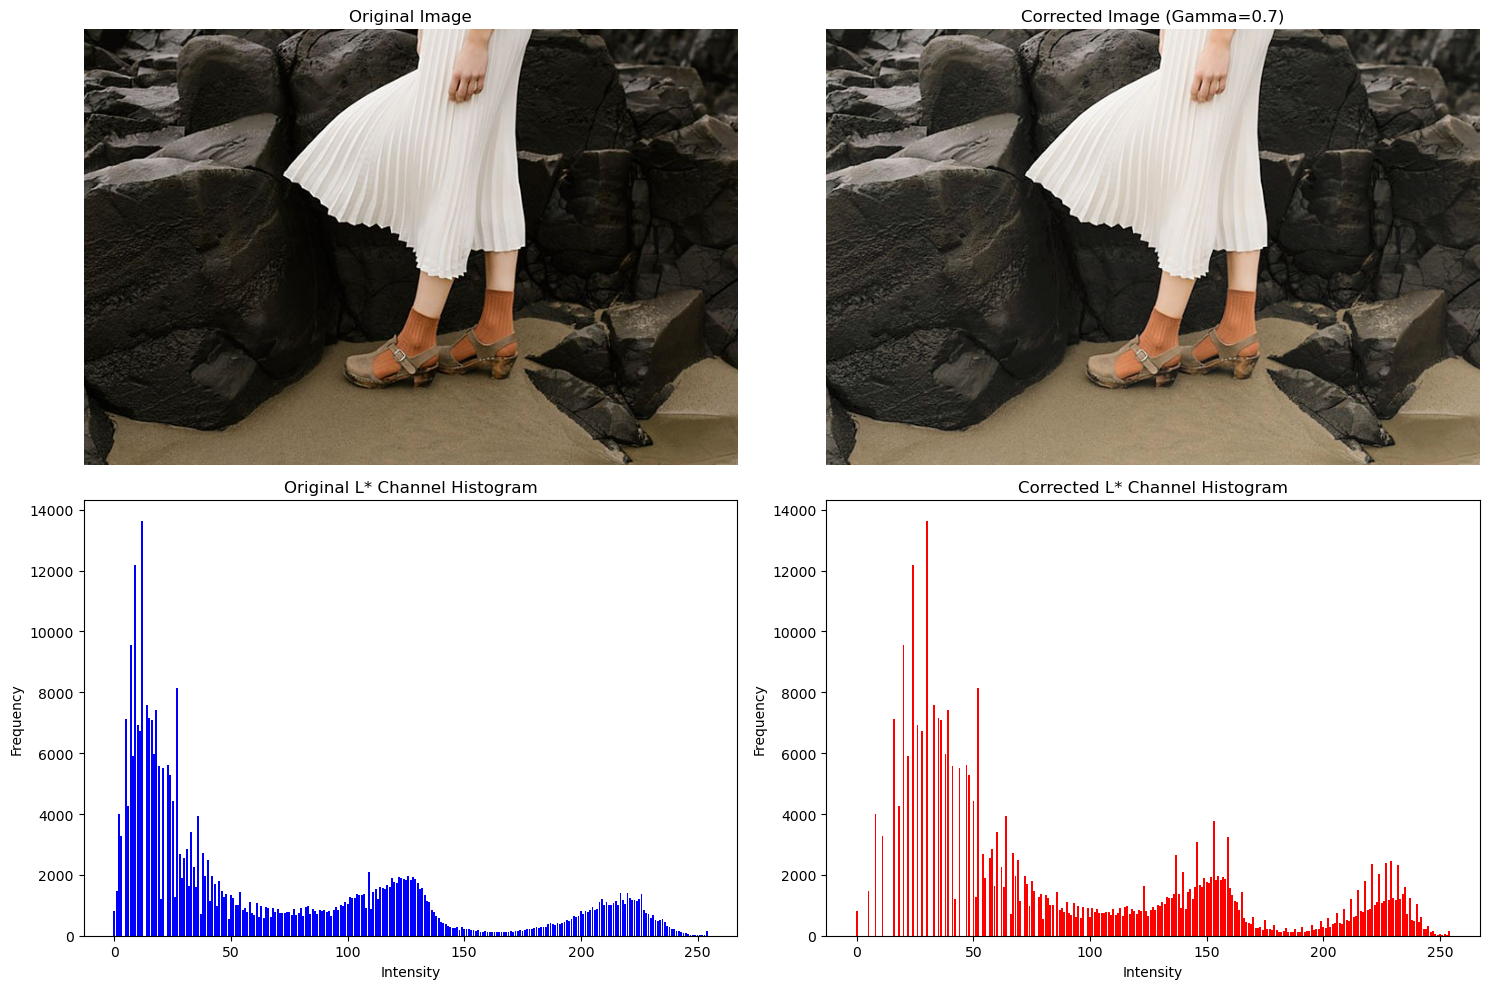

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
input_image = cv.imread('Input/highlights_and_shadows.jpg')

# Convert the image to the L*a*b* color space
lab_image = cv.cvtColor(input_image, cv.COLOR_BGR2LAB)

# Extract the L* channel
L_channel = lab_image[:, :, 0]
hist_original, _ = np.histogram(L_channel, bins=np.arange(0, 256), range=(0, 256))

# Define the gamma value
gamma = 0.7  

# Apply gamma correction to the L* channel
corrected_L_channel = np.power(L_channel / 255, gamma) * 255

# Clip the values to ensure they are in the valid range [0, 255]
corrected_L_channel = np.clip(corrected_L_channel, 0, 255)

# Update the L* channel in the L*a*b* image
lab_image[:, :, 0] = corrected_L_channel.astype(np.uint8)

# Convert the corrected L*a*b* image back to the original color space
corrected_image = cv.cvtColor(lab_image, cv.COLOR_LAB2BGR)

# Calculate histograms of the original and corrected L* channels using numpy

hist_corrected, _ = np.histogram(corrected_L_channel, bins=np.arange(0, 256), range=(0, 256))

# Display the original image, corrected image, and histograms
# Display the original image, corrected image, and histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(corrected_image, cv.COLOR_BGR2RGB))
plt.title('Corrected Image (Gamma=' + str(gamma) + ')')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.bar(np.arange(255), hist_original, color='b')
plt.title('Original L* Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.bar(np.arange(255), hist_corrected, color='r')
plt.title('Corrected L* Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.tight_layout()

# Save the plots and corrected image
plt.savefig('Output/corrected_image_and_plots_Q3.png')

# Save the corrected image
cv.imwrite('Output/corrected_image_Q3.jpg', corrected_image)

plt.show()
